In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1.1 Data Load and normal inspection

In [3]:
leads=pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
leads.shape

(9240, 37)

In [5]:
leads.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [6]:
##Prsopect and Lead number seems like unique we shall remove them after checking for duplication

leads.duplicated(['Prospect ID','Lead Number']).sum()


0

In [7]:
## Removing them

leads.drop(['Prospect ID','Lead Number'],inplace=True,axis=1)

Identifying null value percentage present in each column

In [8]:


a=((leads.isnull().sum()/len(leads))*100)
a

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

In [9]:
##Extracting the column whose missing value is >40% for further inspection

a[a>40].sort_values(ascending=False).index

Index(['Lead Quality', 'Asymmetrique Profile Score',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Index'],
      dtype='object')

Based on the above inference we could see that Lead Quality and all type of assymetric data are handled by the company/client . Since there are more than 40% of missing values we shall remove them.

In [10]:
To_Remove_list=a[a>40].index
To_Remove_list

Index(['Lead Quality', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')

In [11]:
leads.drop(To_Remove_list,axis=1,inplace=True)

In [12]:
leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

Let us try to impute other columns where we had the missing values



In [13]:
b=((leads.isnull().sum()/len(leads))*100>0)
column_to_impute=b[b>0].index
column_to_impute

Index(['Lead Source', 'TotalVisits', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'Lead Profile',
       'City'],
      dtype='object')

In [14]:
leads[column_to_impute]=leads[column_to_impute].fillna('missing')

Before imputing these columns first let us find are there any duplicate names available


In [15]:
dup_list=list(set(leads['Lead Source'].values.tolist()))

We could find 'Google' and 'google' are duplicated but they are case sensitive.Instead of having a naive check we shall use the loop and temporarily impute the missing values to '0' as it might affect if we retain nan values

In [16]:
for j in column_to_impute:
  if j not in ['TotalVisits' ,'Page Views Per Visit']:
    total_list=list(set(leads[j].values.tolist()))
    dup={}
    dup_list=[i.lower() for i in total_list]
    for i in dup_list:
      if i not in dup:
        dup[i]=1
      else:
        dup[i]+=1
    print(j,{k:v for (k,v) in dup.items() if v > 1})

Lead Source {'google': 2}
Last Activity {}
Country {}
Specialization {}
How did you hear about X Education {}
What is your current occupation {}
What matters most to you in choosing a course {}
Tags {}
Lead Profile {}
City {}


It seems like only the Lead source categorical variable has duplicates in the name of Google , we shall make it to google 

In [17]:
leads['Lead Source']=leads['Lead Source'].replace('Google','google')

In [18]:
leads['Lead Source'].value_counts()

google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
missing                36
bing                    6
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
NC_EDM                  1
Pay per Click Ads       1
youtubechannel          1
blog                    1
WeLearn                 1
welearnblog_Home        1
testone                 1
Name: Lead Source, dtype: int64

Now we shall impute the missing values one by one based on mode count

In [19]:
column_to_impute

Index(['Lead Source', 'TotalVisits', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'Lead Profile',
       'City'],
      dtype='object')

# 1.2 Handling Categorical Variables

Let us create a custom countplot to understand pictorically about the dependance of each variable with the target variable

# Country vs converted

In [20]:
def plot(a):
  plt.figure(figsize=(15,5))
  s1=sns.countplot(leads[a], hue=leads.Converted)
  s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
  plt.show()

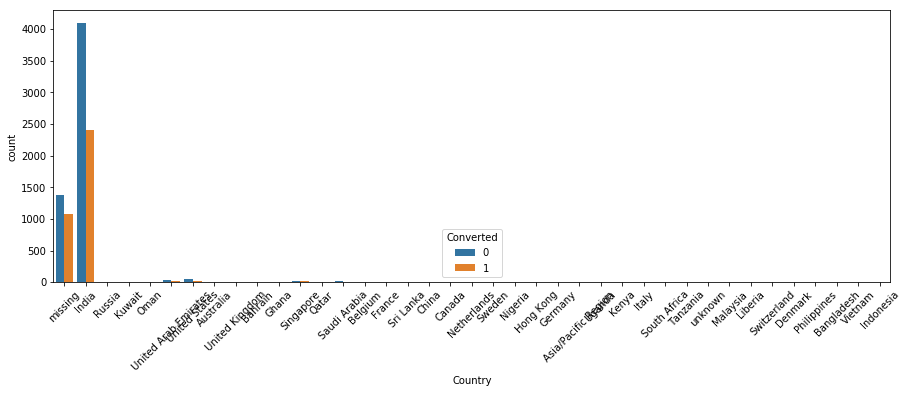

In [21]:
plot('Country')

Here we could see that the data is skewed towards India mostly than other countries so we can remove this as this might not bring any insight to our model .

In [22]:
##Remove column details

cols_to_drop=[]
cols_to_drop.append('Country')

# City vs Converted

In [23]:
leads['City'].value_counts()

Mumbai                         3222
Select                         2249
missing                        1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [24]:
leads['City']=leads['City'].replace(['Select','missing'],'Other Cities')

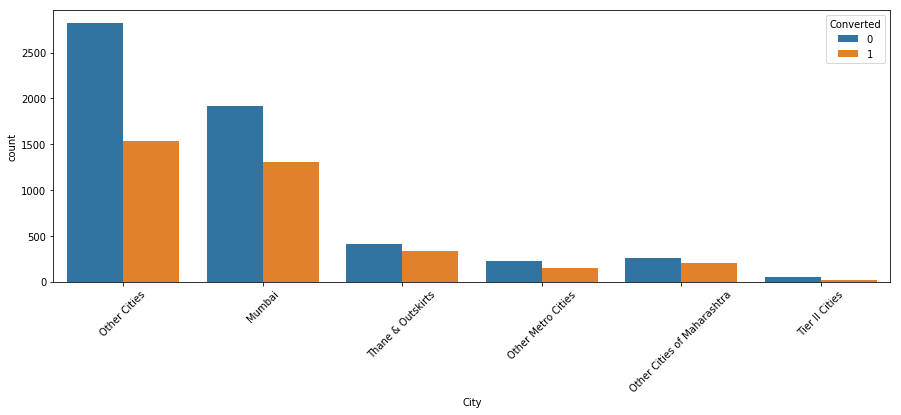

In [25]:
plot('City')

We need to consult with the business about the 'other cities' as we categorized the 'select' and 'missing cities' under this category and we can not drop this as we could see each city has fair relation with the target variable

# Lead Source vs converted

In [26]:
a=(leads['Lead Source'].value_counts()/len(leads))*100<2
others_to_impute=a[a].index.tolist()

In [27]:
leads['Lead Source']=leads['Lead Source'].replace(others_to_impute,'other_lead_sources')
leads['Lead Source']=leads['Lead Source'].fillna('google')

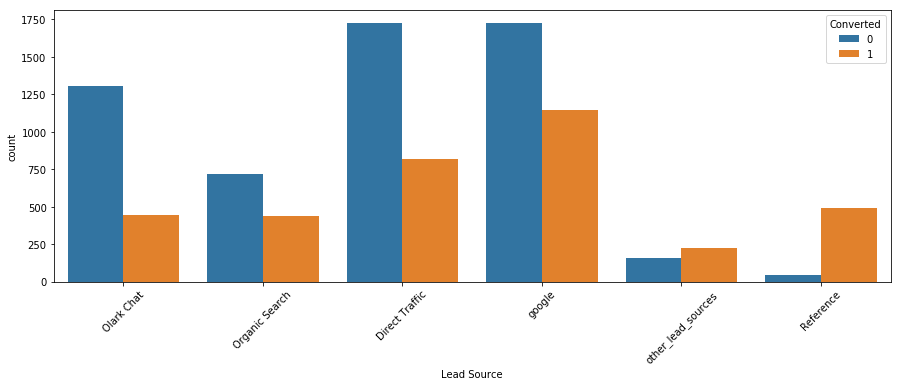

In [28]:
plot('Lead Source')

Lead source with Google / Direct Traffic has the highest lead converion rate

We have grouped the data whose occurance is less than 2% into 'other_lead_sources' as they account to less interpretability 

# Plotting last activity vs converted

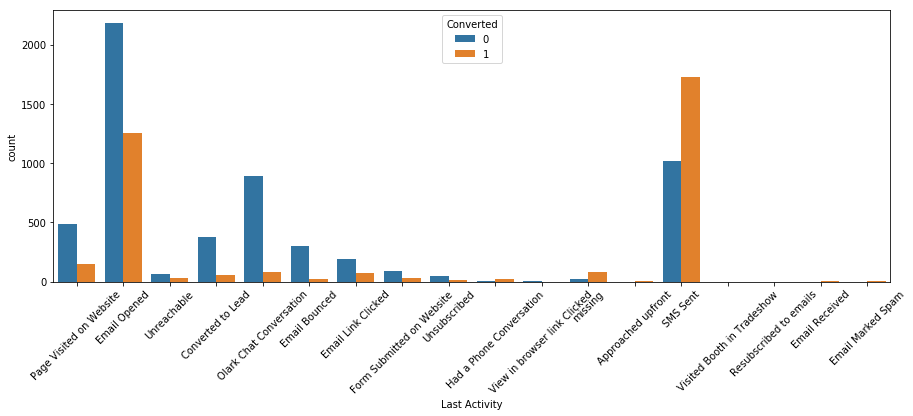

In [29]:
plot('Last Activity')

If we observe the trend of Last Activity we could notice that there are many rare occurances which we can bin to a common category called 'other activity' so that we can reduce the level of categorical variables , also these variables which are to be binned are not of utmost importance so it will not affect the model performance and interpretability 

In [30]:
##Binning rare occurances which are less than 2% occurances 

bin=((leads['Last Activity'].value_counts()/len(leads))*100<=2)
to_bin=bin[bin].index.tolist()


In [31]:
leads['Last Activity']=leads['Last Activity'].replace([to_bin],'other activity')

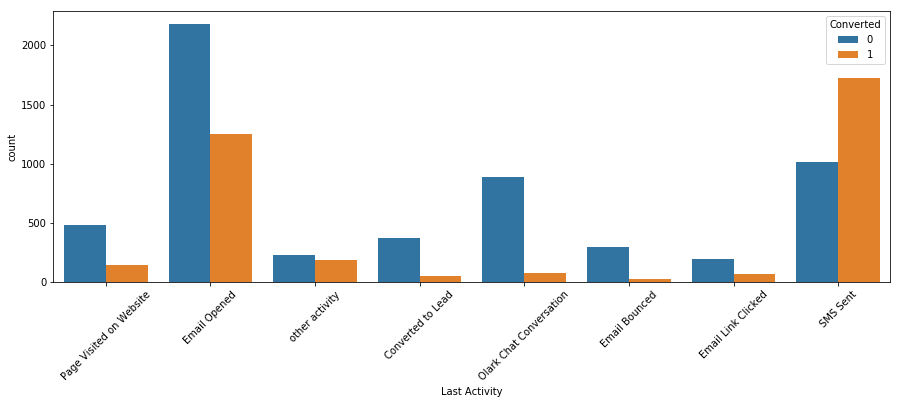

In [32]:
plot('Last Activity')

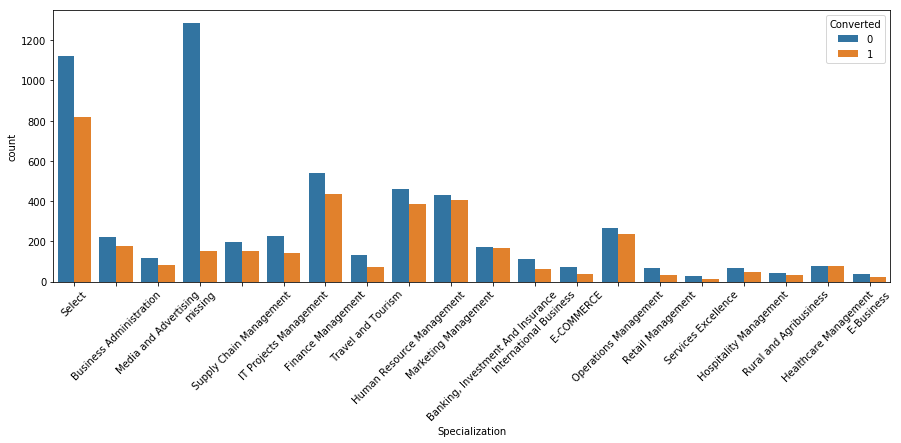

In [33]:
plot('Specialization')

We can not simply impute the select and missing to its mode as these missing values seem to be more dominating and we can bin it to others and retain without imputing or deleting the columns. Also we can group management related courses under common category as 'management courses'

In [34]:
total_manag=list(set(leads['Specialization'].values.tolist()))
to_replace=[i for i in total_manag if 'management' in i.lower()]
print(to_replace)
    

['Supply Chain Management', 'Retail Management', 'Finance Management', 'IT Projects Management', 'Hospitality Management', 'Operations Management', 'Healthcare Management', 'Human Resource Management', 'Marketing Management']


In [35]:
leads['Specialization']=leads['Specialization'].replace(to_replace,'management courses')

In [36]:
list(set(leads['Specialization'].values.tolist()))

['Business Administration',
 'E-COMMERCE',
 'Travel and Tourism',
 'Services Excellence',
 'management courses',
 'missing',
 'International Business',
 'E-Business',
 'Media and Advertising',
 'Rural and Agribusiness',
 'Banking, Investment And Insurance',
 'Select']

In [37]:
## We can also bin business related courses together
leads['Specialization']=leads['Specialization'].replace(['E-Business','Rural and Agribusiness',
                                                         'Business Administration','International Business'],'business courses')

In [38]:
leads['Specialization']=leads['Specialization'].replace(['Select','missing'],'other specialisation')

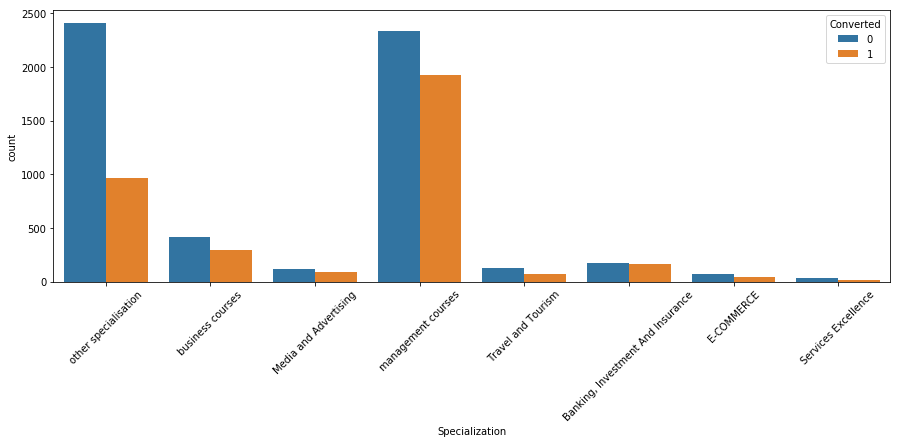

In [39]:
plot('Specialization')

Management type of courses has the highest lead conversion

---



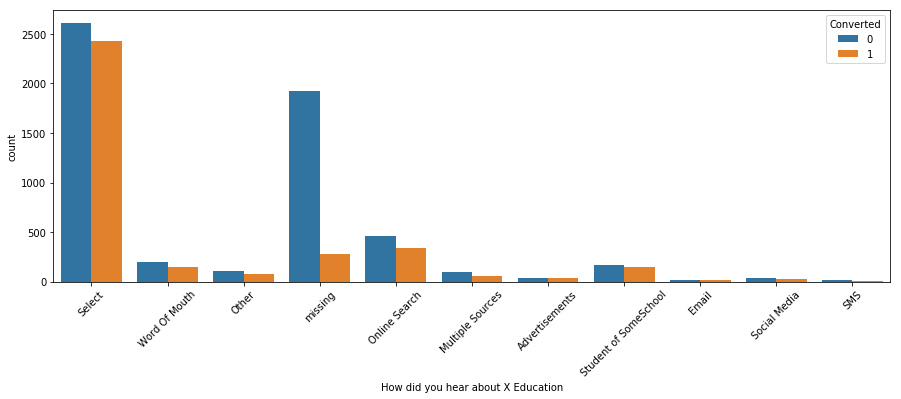

In [40]:
plot('How did you hear about X Education')

We could observe that 'How did you hear about X Education' is almost having missing values and resonating same as that of 'Last Activity' so we can remove them

In [41]:
cols_to_drop.append('How did you hear about X Education')

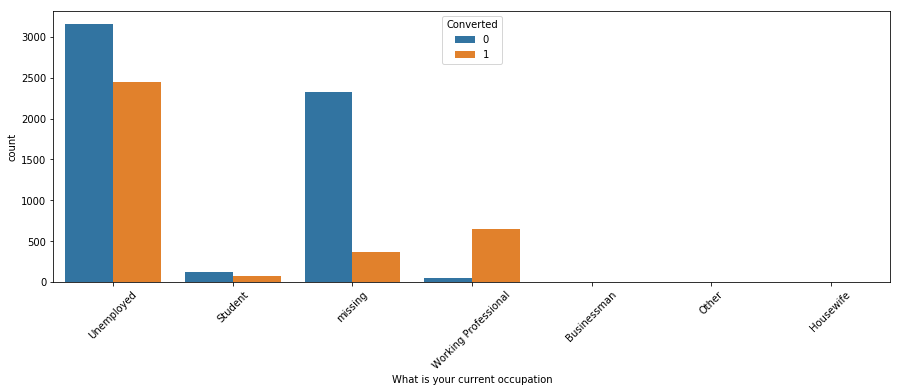

In [42]:
plot('What is your current occupation')

In [43]:
round(leads['What is your current occupation'].value_counts()/len(leads)*100,2)

Unemployed              60.61
missing                 29.11
Working Professional     7.64
Student                  2.27
Other                    0.17
Housewife                0.11
Businessman              0.09
Name: What is your current occupation, dtype: float64

In [44]:
##Tagging missing values with others

leads['What is your current occupation']=leads['What is your current occupation'].replace(['missing','Housewife','Businessman'],'Other')

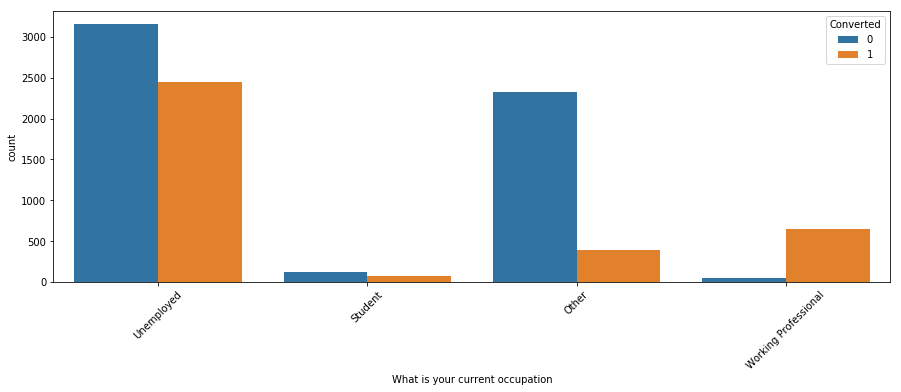

In [45]:
plot('What is your current occupation')

We shall focus on working professional here and unemployed as the latter may be eager in upskilling themselves for industy ready

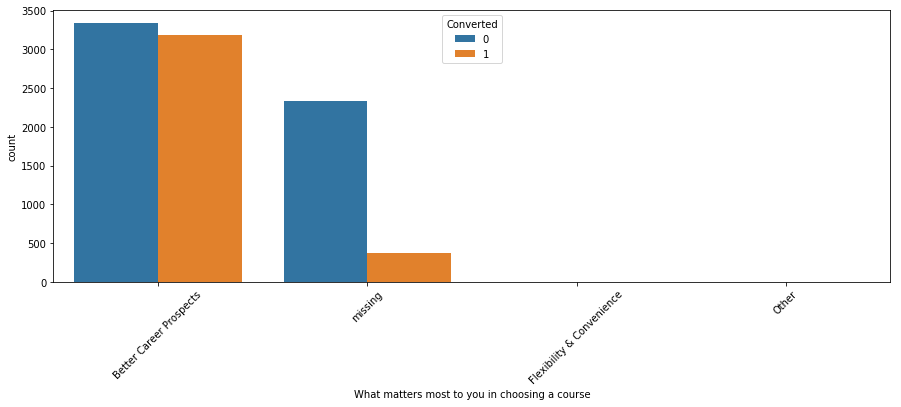

In [46]:
plot('What matters most to you in choosing a course')

In [47]:
leads['What matters most to you in choosing a course']=leads['What matters most to you in choosing a course'].replace('missing','Other')

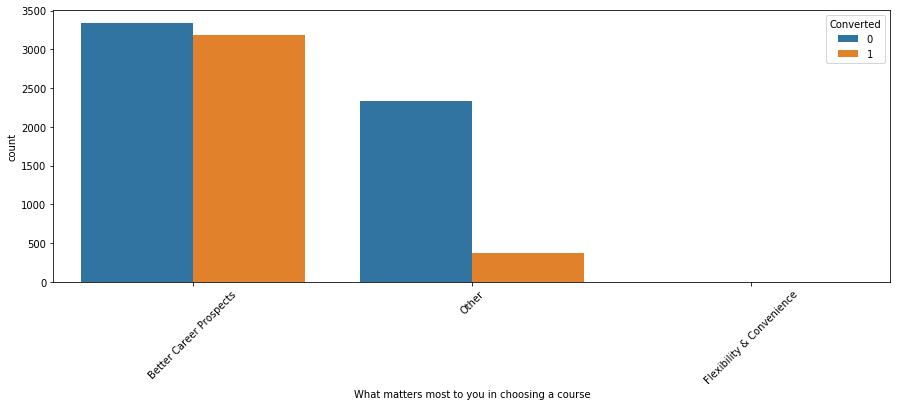

In [48]:
plot('What matters most to you in choosing a course')

We oserver that the above data is skewed towards 'Better Carrer Prospect' and there is no evidence for others so we shall remove this column

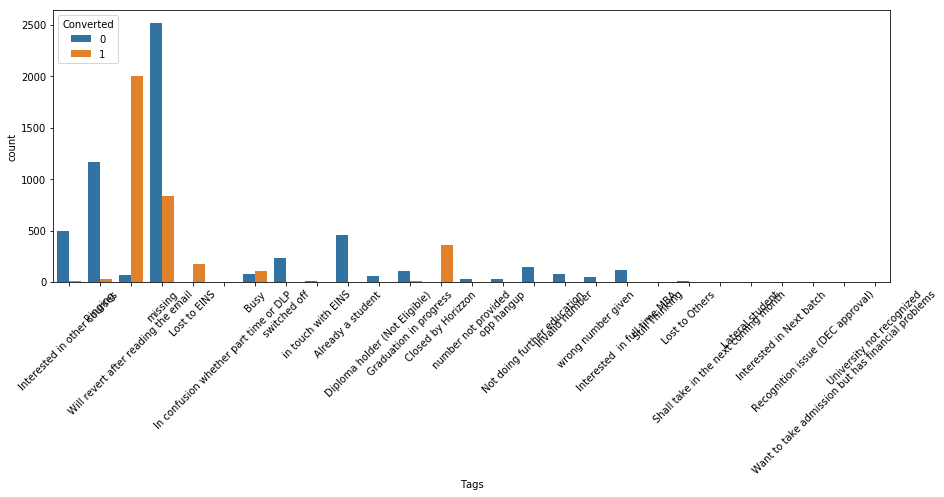

In [49]:
plot('Tags')

In [50]:
bin=((leads['Tags'].value_counts()/len(leads))*100<=2)
to_bin=bin[bin].index.tolist()
to_bin.append('missing')
to_bin

['Lost to EINS',
 'Not doing further education',
 'Interested  in full time MBA',
 'Graduation in progress',
 'invalid number',
 'Diploma holder (Not Eligible)',
 'wrong number given',
 'opp hangup',
 'number not provided',
 'in touch with EINS',
 'Lost to Others',
 'Still Thinking',
 'Want to take admission but has financial problems',
 'In confusion whether part time or DLP',
 'Interested in Next batch',
 'Lateral student',
 'University not recognized',
 'Shall take in the next coming month',
 'Recognition issue (DEC approval)',
 'missing']

In [51]:
leads['Tags']=leads['Tags'].replace(to_bin,'other tags')

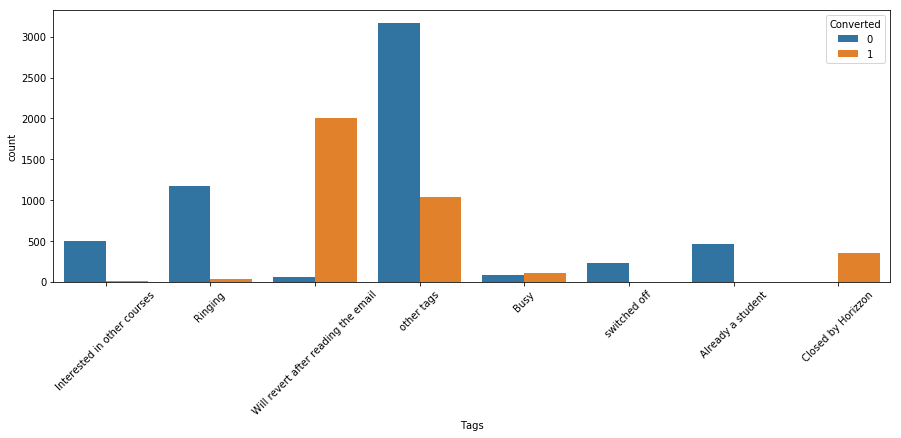

In [52]:
plot('Tags')

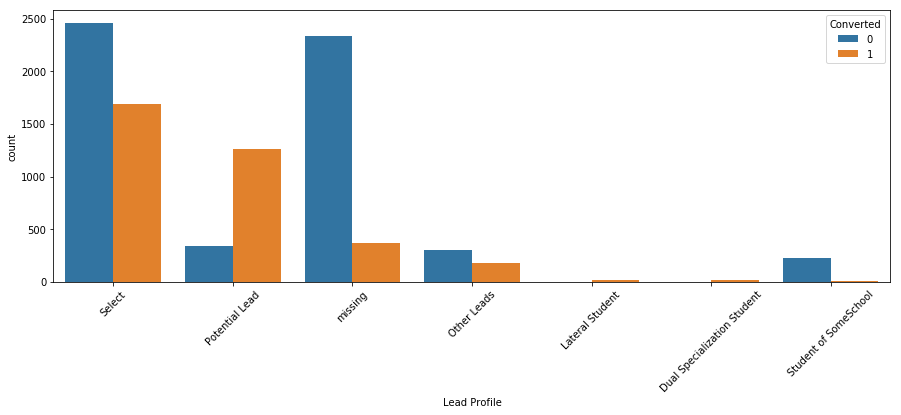

In [53]:
plot('Lead Profile')

In [54]:
round(leads['Lead Profile'].value_counts()/len(leads)*100,2)

Select                         44.87
missing                        29.32
Potential Lead                 17.46
Other Leads                     5.27
Student of SomeSchool           2.61
Lateral Student                 0.26
Dual Specialization Student     0.22
Name: Lead Profile, dtype: float64

In [55]:
##Tagging missing and select under other leads
leads['Lead Profile']=leads['Lead Profile'].replace(['missing','Select','Lateral Student','Dual Specialization Student'],'Other Leads')


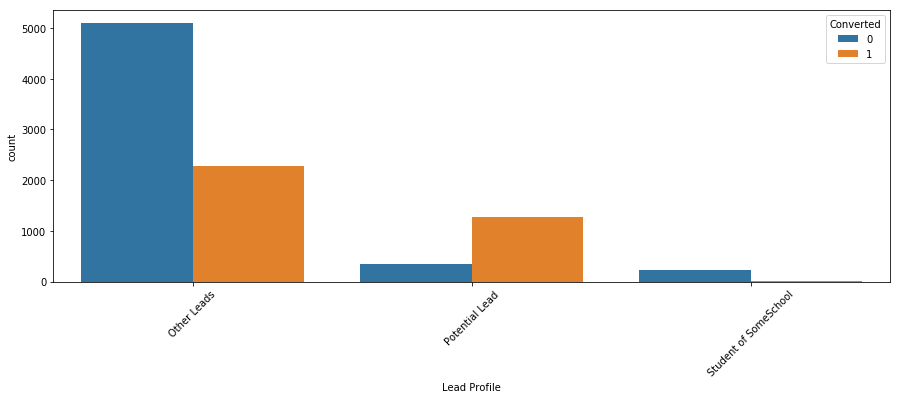

In [56]:
plot('Lead Profile')

In [57]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0,0,0,Page Visited on Website,missing,...,No,No,Interested in other courses,No,No,Other Leads,Other Cities,No,No,Modified
1,API,Organic Search,No,No,0,5,674,2.5,Email Opened,India,...,No,No,Ringing,No,No,Other Leads,Other Cities,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2,1532,2,Email Opened,India,...,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1,305,1,other activity,India,...,No,No,Ringing,No,No,Other Leads,Mumbai,No,No,Modified
4,Landing Page Submission,google,No,No,1,2,1428,1,Converted to Lead,India,...,No,No,Will revert after reading the email,No,No,Other Leads,Mumbai,No,No,Modified


Exploring more categorical columns 

1. Lead Origin
2. Lead Source
3. Do not call/Do not email
4. Search , Magazine , Newspaper Article
5. X_Education Forums , Newspaper
6. Digital Advertisements , Recommendations
7. Receive more updates about the courses
8. Supply chain update
9. Mastering interview guide
10. Payment through cheque

In [58]:
to_inspect_list=['Lead Origin', 'Do Not Email',
       'Do Not Call','Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations','Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content','I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity']

# Let us analyse the data distributed in these columns through value_counts to see the data pattern

In [59]:
for i in to_inspect_list:
  print('+---------------+')
  print(i)
  print(leads[i].value_counts())

+---------------+
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
+---------------+
Do Not Email
No     8506
Yes     734
Name: Do Not Email, dtype: int64
+---------------+
Do Not Call
No     9238
Yes       2
Name: Do Not Call, dtype: int64
+---------------+
Search
No     9226
Yes      14
Name: Search, dtype: int64
+---------------+
Magazine
No    9240
Name: Magazine, dtype: int64
+---------------+
Newspaper Article
No     9238
Yes       2
Name: Newspaper Article, dtype: int64
+---------------+
X Education Forums
No     9239
Yes       1
Name: X Education Forums, dtype: int64
+---------------+
Newspaper
No     9239
Yes       1
Name: Newspaper, dtype: int64
+---------------+
Digital Advertisement
No     9236
Yes       4
Name: Digital Advertisement, dtype: int64
+---------------+
Through Recommendations
No     9233
Yes       7
Name: Thr

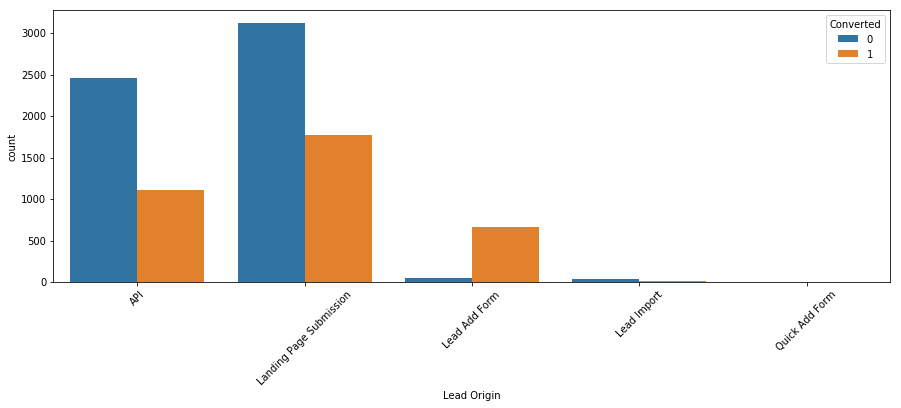

In [60]:
##Plotting Lead origin vs Converted
plot('Lead Origin')

Landing page submission and API from the Lead source has better conversion rate

## Please find the inferences made:

1. There are many imbalanced dataset columns which are skewed towards a particular value , we shall remove them completely as it does not add any values ....these columns include 
           
           1. X Education Forums
           2. Magazine , Newspapers , Newspaper article
           3. Do Not Call 
           4. Digital advertisement 
           5. Recommendation
           6. Supply chain course
           7. DM on the contents / aggreed to pay through cheque
           8. Search

2. The column 'Last Notable Activity' is in close association with the 'Last Activity' , we shall remove this column

3. So we are going to retain only the below columns for further analysis

            1. A free copy of Mastering The Interview
            2. Lead Origin
            3. Do not email

           

In [61]:
leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [62]:
cols_to_drop=cols_to_drop +['X Education Forums','Magazine','Newspaper',
                    'Newspaper Article','Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses','Update me on Supply Chain Content', 
         'Get updates on DM Content','I agree to pay the amount through cheque',
          'Last Notable Activity','What matters most to you in choosing a course','Search','Do Not Call']

In [63]:
cols_to_drop

['Country',
 'How did you hear about X Education',
 'X Education Forums',
 'Magazine',
 'Newspaper',
 'Newspaper Article',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'Last Notable Activity',
 'What matters most to you in choosing a course',
 'Search',
 'Do Not Call']

In [64]:
leads.drop(cols_to_drop,inplace=True,axis=1)

In [65]:
leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Tags', 'Lead Profile', 'City',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [66]:
leads=leads.replace('missing',np.nan)

# 1.3 Handling numerical variables

In [67]:
leads.select_dtypes(['int64','float64'])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,0,0.0,0,0.00
1,0,5.0,674,2.50
2,1,2.0,1532,2.00
3,0,1.0,305,1.00
4,1,2.0,1428,1.00
5,0,0.0,0,0.00
6,1,2.0,1640,2.00
7,0,0.0,0,0.00
8,0,2.0,71,2.00
9,0,4.0,58,4.00


# Total Visit

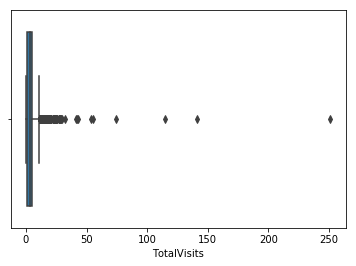

In [68]:
sns.boxplot(leads['TotalVisits'])
plt.show()

In [69]:
## Seems like the TotalVisists has some outlier in the data

leads['TotalVisits'].describe([0.10,0.25,0.50,0.75,0.95,0.99,1])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
10%         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
95%        10.000000
99%        17.000000
100%      251.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [70]:
leads['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
23.0        6
21.0        6
27.0        5
24.0        5
25.0        5
22.0        3
28.0        2
29.0        2
26.0        2
251.0       1
74.0        1
30.0        1
141.0       1
54.0        1
41.0        1
115.0       1
43.0        1
42.0        1
32.0        1
55.0        1
Name: TotalVisits, dtype: int64

In [71]:
leads.isnull().sum()

Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Converted                                   0
TotalVisits                               137
Total Time Spent on Website                 0
Page Views Per Visit                      137
Last Activity                               0
Specialization                              0
What is your current occupation             0
Tags                                        0
Lead Profile                                0
City                                        0
A free copy of Mastering The Interview      0
dtype: int64

In [72]:
## Removing the >99% region 

Q_99=leads['TotalVisits'].quantile(0.99)

leads=leads[(leads['TotalVisits']<=Q_99)]


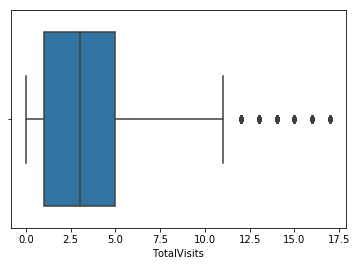

In [73]:
##Plotting again

sns.boxplot(leads['TotalVisits'])
plt.show()

# Total Time Spent on Website

In [74]:
leads['Total Time Spent on Website'].describe([0.10,0.25,0.50,0.75,0.95,0.99,1])

count    9020.000000
mean      479.759534
std       544.688157
min         0.000000
10%         0.000000
25%         7.000000
50%       243.000000
75%       915.250000
95%      1554.050000
99%      1836.620000
100%     2272.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

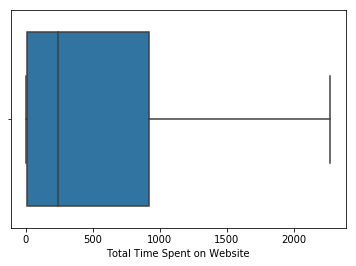

In [75]:
##No outlier in the data
sns.boxplot(leads['Total Time Spent on Website'])
plt.show()

# Page Views Per Visit

In [76]:
leads['Page Views Per Visit'].describe([0.10,0.25,0.50,0.75,0.95,0.99,1])

count    9020.000000
mean        2.337271
std         2.062363
min         0.000000
10%         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
95%         6.000000
99%         9.000000
100%       16.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

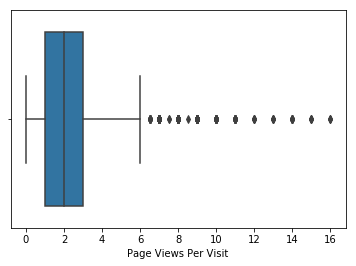

In [77]:
sns.boxplot(leads['Page Views Per Visit'])
plt.show()

In [78]:
## Doing the same outlier treatment we obtain

Q_99=leads['Page Views Per Visit'].quantile(0.99)

leads=leads[(leads['Page Views Per Visit']<=Q_99)]


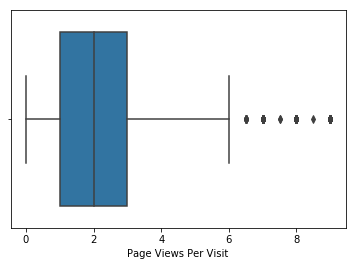

In [79]:
##Plotting again we get

sns.boxplot(leads['Page Views Per Visit'])
plt.show()

# Analysing the numerical columns vs converted

Page Views Per Visit vs converted

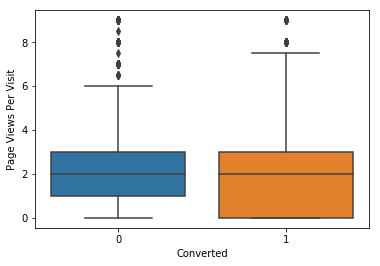

In [80]:
sns.boxplot(x=leads.Converted,y=leads['Page Views Per Visit'])
plt.show()

Inferences for Page views/visit vs Converted

1. There is no much evidence to conclude that the page views per visit does contribute to getting the customers converted 

2. However the upper quartile is longer for the converted customers still it is not a strong factor

TotalVisits vs Converted

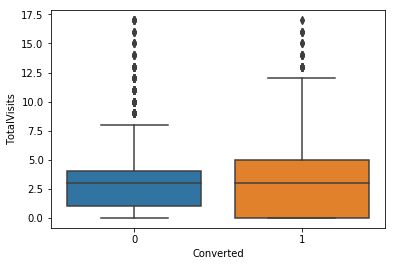

In [81]:
sns.boxplot(x=leads.Converted,y=leads['TotalVisits'])
plt.show()

##Inferences drawn for Total Visits vs Converted

1. The number of converted customers slightly increase as the total visit count increases

2. However the median of total visist remain the same for both type of customers

Total Time Spent on Website vs Converted

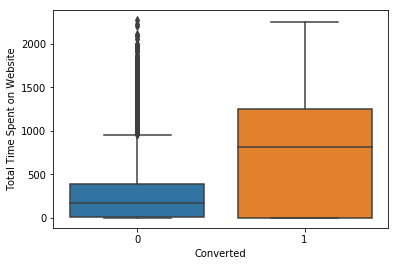

In [82]:
sns.boxplot(x=leads.Converted,y=leads['Total Time Spent on Website'])
plt.show()

Clearly as total time spent on the website is more so is the conversion rate

Important to Note:

We have removed the data whose percentile is more than 99% i.,e those data are less than 1% frequent in the given columns , however to better handle we can create a separate model for outlier data alone . To keep things simple , we removed the outliers and we proceeded further.

Again checking for null values

In [83]:
leads.isnull().sum()

Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
Tags                                      0
Lead Profile                              0
City                                      0
A free copy of Mastering The Interview    0
dtype: int64

# 1.4 We shall  encode the categorical variables

Let us map 0 and 1 to two level categorical column and rest we shall apply dummy encoding

In [84]:
##Extracting two-level categorical data

cat_list=leads.select_dtypes('object').columns.tolist()

In [85]:
binary_encode=[]
dummy_encode=[]
for i in cat_list:
  if len(leads[i].value_counts().index.tolist())==2:
    binary_encode.append(i)
  else:
    dummy_encode.append(i)

  

In [86]:
print('The columns which needs to be binary encoded ', binary_encode)
print('The columns which needs to be dummy encoded ', dummy_encode)

The columns which needs to be binary encoded  ['Do Not Email', 'A free copy of Mastering The Interview']
The columns which needs to be dummy encoded  ['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'Tags', 'Lead Profile', 'City']


## For binary encoded columns we shall map 0 to No and 1 to Yes

In [87]:
def map(x):
  return x.map({'Yes':1,'No':0})
leads[['Do Not Email', 'A free copy of Mastering The Interview']]=leads[['Do Not Email', 'A free copy of Mastering The Interview']].apply(map)

# Use dummy encoding or one-hot for other columns as shown in dummy encoded list

In [88]:
##For Lead origin

dummy1 = pd.get_dummies(leads['Lead Origin'], drop_first=True)

# Adding the results to the master dataframe
leads = pd.concat([leads, dummy1], axis=1)


In [89]:
##For Lead Source

dummy2=pd.get_dummies(leads['Lead Source'],prefix='Lead Source')
dummy2 = dummy2.drop(['Lead Source_other_lead_sources'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,dummy2], axis=1)

In [90]:
##For Last Activity

dummy3=pd.get_dummies(leads['Last Activity'],prefix='Last Activity')
dummy3 = dummy3.drop(['Last Activity_other activity'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,dummy3], axis=1)


In [91]:
##For SPecialization

dummy4=pd.get_dummies(leads['Specialization'],prefix='Specialization')
dummy4 = dummy4.drop(['Specialization_other specialisation'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,dummy4], axis=1)

In [92]:
##For What is your current occupation

dummy5=pd.get_dummies(leads['What is your current occupation'],prefix='What is your current occupation')
dummy5 = dummy5.drop(['What is your current occupation_Other'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,dummy5], axis=1)

In [93]:
##For Tag

dummy6=pd.get_dummies(leads['Tags'],prefix='Tags')
dummy6 = dummy6.drop(['Tags_other tags'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,dummy6], axis=1)

In [94]:
##For Lead Profile
dummy7=pd.get_dummies(leads['Lead Profile'],prefix='Lead Profile')
dummy7 = dummy7.drop(['Lead Profile_Other Leads'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,dummy7], axis=1)

In [95]:
##For City

dummy8=pd.get_dummies(leads['City'],prefix='City')
dummy8 = dummy8.drop(['City_Other Cities'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,dummy8], axis=1)

In [96]:
## Now we shall remove earlier categorical columns with dummy encoding 
leads.drop(dummy_encode,inplace=True,axis=1)


In [97]:
#Checking the shape of the final dataset
leads.shape

(8953, 45)

# 1.5 Checking the correlation and removing them if any before doing test-train split

Now let us find  Correlation between dummy variables and we shall remove if the correlation %>60

In [98]:
leads_corr = leads.corr()
  
# Retain upper triangular values of correlation matrix and
# make Lower triangular values Null by condiioning the matrix value to boolean
upper_matrix = leads_corr.where(np.triu(np.ones(leads_corr.shape), k=1).astype(np.bool))
#Unstacking to make it 1-d and reseting index
upper_matrix=upper_matrix.unstack().reset_index()
upper_matrix.columns=['Column 1','Column 2','Correlation']
upper_matrix=upper_matrix.sort_values(by='Correlation',ascending=False).iloc[:10]
upper_matrix

,Column 1,Column 2,Correlation
547,Lead Source_Reference,Lead Add Form,0.845017
182,Page Views Per Visit,TotalVisits,0.721126
1786,Lead Profile_Student of SomeSchool,Tags_Already a student,0.670034
1621,Tags_Will revert after reading the email,Converted,0.654624
675,Last Activity_Email Bounced,Do Not Email,0.626723
410,Lead Source_Direct Traffic,A free copy of Mastering The Interview,0.607037
275,Landing Page Submission,A free copy of Mastering The Interview,0.564394
274,Landing Page Submission,Page Views Per Visit,0.538432
411,Lead Source_Direct Traffic,Landing Page Submission,0.530440
1221,Specialization_management courses,Landing Page Submission,0.505792


# We shall drop only the dummy encoded columns which show correlation with other columns and correlation factor>60%

In [99]:
leads.drop(['Lead Source_Reference','TotalVisits','Lead Profile_Student of SomeSchool','Last Activity_Email Bounced'],
             axis=1,inplace=True)

In [100]:
##Let us plot the correlation matrix again

leads_corr = leads.corr()
  
# Retain upper triangular values of correlation matrix and
# make Lower triangular values Null by condiioning the matrix value to boolean
upper_matrix = leads_corr.where(np.triu(np.ones(leads_corr.shape), k=1).astype(np.bool))
#Unstacking to make it 1-d and reseting index
upper_matrix=upper_matrix.unstack().reset_index()
upper_matrix.columns=['Column 1','Column 2','Correlation']
upper_matrix=upper_matrix.sort_values(by='Correlation',ascending=False).iloc[:10]
upper_matrix

,Column 1,Column 2,Correlation
1354,Tags_Will revert after reading the email,Converted,0.654624
332,Lead Source_Direct Traffic,A free copy of Mastering The Interview,0.607037
209,Landing Page Submission,A free copy of Mastering The Interview,0.564394
208,Landing Page Submission,Page Views Per Visit,0.538432
333,Lead Source_Direct Traffic,Landing Page Submission,0.530440
989,Specialization_management courses,Landing Page Submission,0.505792
1481,City_Mumbai,Landing Page Submission,0.503092
1468,Lead Profile_Potential Lead,Tags_Will revert after reading the email,0.460120
624,Last Activity_Olark Chat Conversation,Lead Source_Olark Chat,0.424846
1380,Tags_Will revert after reading the email,What is your current occupation_Working Profes...,0.387784


We shall neglect the correlation with convereted as it is dependant variable

In [101]:
##Checking the converted proportion

converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
converted

37.92025019546521

We have only 37% of converted case

In [102]:
##Test_Train split
from sklearn.model_selection import train_test_split
X = leads.drop(['Converted'], axis=1)

X.head()

,Do Not Email,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Landing Page Submission,Lead Add Form,Lead Import,Lead Source_Direct Traffic,Lead Source_Olark Chat,Lead Source_Organic Search,...,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Profile_Potential Lead,City_Mumbai,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0.0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,0,674,2.5,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,0,1532,2.0,1,1,0,0,1,0,0,...,0,0,1,0,1,1,0,0,0,0
3,0,305,1.0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
4,0,1428,1.0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [103]:
# Putting response variable to y
y = leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [104]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Feature Scaling

In [105]:
from sklearn.preprocessing import StandardScaler

In [106]:
scaler = StandardScaler()

X_train[['Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,Do Not Email,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Landing Page Submission,Lead Add Form,Lead Import,Lead Source_Direct Traffic,Lead Source_Olark Chat,Lead Source_Organic Search,...,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Profile_Potential Lead,City_Mumbai,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
9196,0,1.848117,1.455819,0,1,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
4696,0,-0.037832,0.399961,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
3274,0,-0.642138,-0.127967,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2164,0,-0.154676,-0.127967,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1667,0,1.258415,-0.481679,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0


# 2.1 Model Building with Stats Module on train dataset

In [107]:
import statsmodels.api as sm

In [108]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6226
Model Family:                Binomial   Df Model:                           40
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1329.5
Date:                Tue, 12 Oct 2021   Deviance:                       2659.0
Time:                        18:03:38   Pearson chi2:                 6.98e+03
No. Iterations:                     8   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9200      0.483     -3.973      0.000      -2.867      -0.973
Do Not Email                                            -1.3646      0.257     -5.313      0.000      -1.868      -0.861
Total Time Spent on Website                              1.1365      0.060     18.980      0.000       1.019       1.254
Page Views Per Visit                                    -0.2053      0.080     -2.566      0.010      -0.362      -0.048
A free copy of Mastering The Interview                   0.0292      0.169      0.173      0.863      -0.302       0.361
Landing Page Submission                                 -0.2539      0.218     -1.165      0.244      -0.681       0.173
Lead Add Form                                            2.4851      0.527      4.719      0.000       1.453       3.517
Lead Import                                             -0.7078      0.852     -0.831      0.406      -2.377       0.962
Lead Source_Direct Traffic                              -0.4864      0.440     -1.106      0.269      -1.348       0.375
Lead Source_Olark Chat                                   0.5583      0.437      1.277      0.202      -0.299       1.416
Lead Source_Organic Search                              -0.3629      0.437     -0.830      0.406      -1.219       0.494
Lead Source_google                                      -0.3020      0.421     -0.717      0.473      -1.128       0.524
Last Activity_Converted to Lead                         -1.0418      0.380     -2.739      0.006      -1.787      -0.296
Last Activity_Email Link Clicked                        -0.4604      0.401     -1.148      0.251      -1.246       0.325
Last Activity_Email Opened                               0.2252      0.266      0.846      0.398      -0.297       0.747
Last Activity_Olark Chat Conversation                   -1.5120      0.334     -4.528      0.000      -2.167      -0.858
Last Activity_Page Visited on Website                   -0.5611      0.339     -1.654      0.098      -1.226       0.104
Last Activity_SMS Sent                                   1.9007      0.263      7.227      0.000       1.385       2.416
Specialization_Banking, Investment And Insurance         0.2736      0.356      0.768      0.443      -0.425       0.972
Specialization_E-COMMERCE                               -0.0985      0.490     -0.201      0.841      -1.060       0.863
Specialization_Media and Advertising                    -0.4544      0.394     -1.153      0.249      -1.227       0.318
Specialization_Services Excellence                      -0.8998      0.878     -1.024      0.306      -2.622       0.822
Specialization_Travel and Tourism                       -1.4942      0.471     -3.170      0.002      -2.418      -0.570
Specialization_b

Feature Selection using RFE

In [109]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [110]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             
rfe = rfe.fit(X_train, y_train)

In [111]:
rfe.support_

array([ True,  True, False, False, False,  True, False,  True, False,
        True,  True,  True, False, False,  True,  True,  True, False,
       False, False, False,  True, False, False,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True, False, False,
       False, False, False, False])

In [112]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 10),
 ('A free copy of Mastering The Interview', False, 20),
 ('Landing Page Submission', False, 3),
 ('Lead Add Form', True, 1),
 ('Lead Import', False, 2),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Olark Chat', False, 6),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_google', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Link Clicked', False, 5),
 ('Last Activity_Email Opened', False, 11),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Page Visited on Website', True, 1),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Banking, Investment And Insurance', False, 8),
 ('Specialization_E-COMMERCE', False, 21),
 ('Specialization_Media and Advertising', False, 12),
 ('Specialization_Services Excellence', False, 7),
 ('Specialization_Travel and Tourism', True, 1),
 ('Specialization_business courses'

In [113]:
col = X_train.columns[rfe.support_]

Accessing the Stats module

In [114]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6246
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1354.9
Date:                Tue, 12 Oct 2021   Deviance:                       2709.7
Time:                        18:03:39   Pearson chi2:                 6.99e+03
No. Iterations:                     8   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1234      0.127     -8.821      0.000      -1.373      -0.874
Do Not Email                                            -1.4422      0.228     -6.324      0.000      -1.889      -0.995
Total Time Spent on Website                              1.0982      0.058     19.025      0.000       0.985       1.211
Lead Add Form                                            2.1095      0.324      6.509      0.000       1.474       2.745
Lead Source_Direct Traffic                              -1.5563      0.162     -9.617      0.000      -1.873      -1.239
Lead Source_Organic Search                              -1.3311      0.191     -6.983      0.000      -1.705      -0.957
Lead Source_google                                      -1.2462      0.151     -8.264      0.000      -1.542      -0.951
Last Activity_Converted to Lead                         -1.0787      0.293     -3.688      0.000      -1.652      -0.505
Last Activity_Olark Chat Conversation                   -1.5321      0.225     -6.819      0.000      -1.972      -1.092
Last Activity_Page Visited on Website                   -0.7746      0.242     -3.198      0.001      -1.249      -0.300
Last Activity_SMS Sent                                   1.7079      0.114     14.975      0.000       1.484       1.931
Specialization_Travel and Tourism                       -1.4354      0.398     -3.603      0.000      -2.216      -0.655
What is your current occupation_Student                  0.9543      0.507      1.882      0.060      -0.039       1.948
What is your current occupation_Unemployed               1.5012      0.112     13.448      0.000       1.282       1.720
What is your current occupation_Working Professional     2.0377      0.362      5.625      0.000       1.328       2.748
Tags_Already a student                                  -4.2249      0.728     -5.805      0.000      -5.651      -2.799
Tags_Closed by Horizzon                                  5.4618      1.018      5.367      0.000       3.467       7.456
Tags_Interested in other courses                        -3.4214      0.407     -8.406      0.000      -4.219      -2.624
Tags_Ringing                                            -4.0597      0.243    -16.691      0.000      -4.536      -3.583
Tags_Will revert after reading the email                 3.5739      0.194     18.427      0.000       3.194       3.954
Tags_switched off                                       -4.3606      0.618     -7.057      0.000      -5.572      -3.150
========================================================================================================================
"""

In [115]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

9196    0.233155
4696    0.027338
3274    0.203122
2164    0.002493
1667    0.983495
7024    0.358946
8018    0.026257
778     0.188194
6942    0.107934
4440    0.045478
dtype: float64

In [116]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.2331546 , 0.02733792, 0.20312174, 0.00249326, 0.9834955 ,
       0.3589461 , 0.02625653, 0.18819381, 0.1079345 , 0.04547815])

Creating a dataframe with the actual churn flag and the predicted probabilities

In [117]:
y_train_pred_final = pd.DataFrame({'Lead':y_train.values, 'Lead_prob':y_train_pred})
y_train_pred_final['Lead_ID'] = y_train.index
y_train_pred_final.head()

,Lead,Lead_prob,Lead_ID
0,1,0.233155,9196
1,0,0.027338,4696
2,0,0.203122,3274
3,0,0.002493,2164
4,1,0.983495,1667


Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [118]:
y_train_pred_final['predicted'] = y_train_pred_final.Lead_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Lead,Lead_prob,Lead_ID,predicted
0,1,0.233155,9196,0
1,0,0.027338,4696,0
2,0,0.203122,3274,0
3,0,0.002493,2164,0
4,1,0.983495,1667,1


In [119]:
from sklearn import metrics

In [120]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Lead, y_train_pred_final.predicted )
print(confusion)

[[3688  194]
 [ 358 2027]]


In [121]:
# Predicted     not_converted (0)   converted (1)
# Actual
# not_converted (0)       3699      183
# converted (1)           361       2024  

# Inferences

1. We could observe that our model has resulted in False negative 361 and false positive 183 .

2. We could infer that if our model predicts the customer as not a lead on the other hand if the customer is a potential lead , the business spends extra for the customer to convert them to leads.

3. If the customer is actaully not a lead but if our model the customer as a lead , we might miss the lead and thereby resulting in business loss.

4. In other words false positive 183 needs to be less than False negative 361

In [122]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Lead, y_train_pred_final.predicted))

0.9119195787458114


Checking VIFs

In [123]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [124]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,What is your current occupation_Unemployed,4.66
18,Tags_Will revert after reading the email,2.54
3,Lead Source_Direct Traffic,1.91
5,Lead Source_google,1.90
13,What is your current occupation_Working Profes...,1.82
17,Tags_Ringing,1.72
9,Last Activity_SMS Sent,1.70
2,Lead Add Form,1.58
14,Tags_Already a student,1.44
4,Lead Source_Organic Search,1.43


## Metrics beyond simply accuracy as VIF is good

In [125]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [126]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.849895178197065

In [127]:
# Let us calculate specificity
TN / float(TN+FP)

0.9500257599175682

In [128]:
# Calculate false postive rate - predicting converted when customer has not actually converted
print(FP/ float(TN+FP))

0.04997424008243174


In [129]:
# positive predictive value 
print (TP / float(TP+FP))

0.9126519585772175


In [130]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9115175481957489


# Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [131]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [132]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Lead, y_train_pred_final.Lead_prob, drop_intermediate = False )

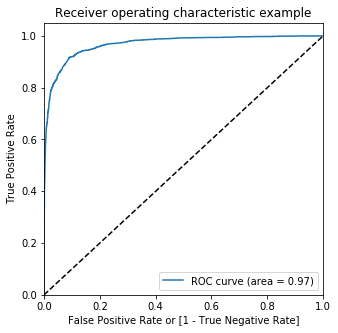

In [133]:
draw_roc(y_train_pred_final.Lead, y_train_pred_final.Lead_prob)

As observed from ROC plot we can justify that our model is performing well

 Finding Optimal Cutoff Point

In [134]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Lead_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Lead,Lead_prob,Lead_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.233155,9196,0,1,1,1,0,0,0,0,0,0,0
1,0,0.027338,4696,0,1,0,0,0,0,0,0,0,0,0
2,0,0.203122,3274,0,1,1,1,0,0,0,0,0,0,0
3,0,0.002493,2164,0,1,0,0,0,0,0,0,0,0,0
4,1,0.983495,1667,1,1,1,1,1,1,1,1,1,1,1


In [135]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Lead, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380565  1.000000  0.000000
0.1   0.1  0.807883  0.977358  0.703761
0.2   0.2  0.886549  0.944654  0.850850
0.3   0.3  0.905058  0.919916  0.895930
0.4   0.4  0.912877  0.884696  0.930191
0.5   0.5  0.911920  0.849895  0.950026
0.6   0.6  0.908888  0.820126  0.963421
0.7   0.7  0.905697  0.797065  0.972437
0.8   0.8  0.890697  0.741719  0.982226
0.9   0.9  0.865167  0.662893  0.989438


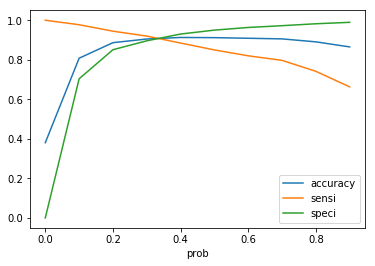

In [136]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

Here 0.35 is the optimal cut-off point

In [137]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Lead_prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final['Lead_Score']=round(y_train_pred_final['Lead_prob']*100,0)

y_train_pred_final.head()

,Lead,Lead_prob,Lead_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,1,0.233155,9196,0,1,1,1,0,0,0,0,0,0,0,0,23.0
1,0,0.027338,4696,0,1,0,0,0,0,0,0,0,0,0,0,3.0
2,0,0.203122,3274,0,1,1,1,0,0,0,0,0,0,0,0,20.0
3,0,0.002493,2164,0,1,0,0,0,0,0,0,0,0,0,0,0.0
4,1,0.983495,1667,1,1,1,1,1,1,1,1,1,1,1,1,98.0


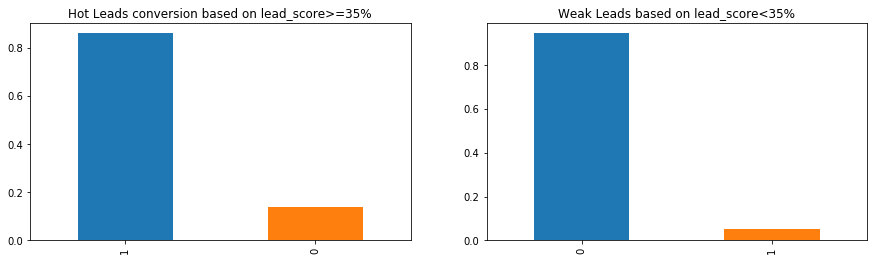

In [138]:
##Plotting Barchart based on our lead_score >35
plt.figure(figsize=[15,4])
ax1=plt.subplot(1,2,1)
y_train_pred_final[y_train_pred_final['Lead_Score']>=35.0].Lead.value_counts(normalize=True).plot.bar()
plt.title('Hot Leads conversion based on lead_score>=35%')
ax2=plt.subplot(1,2,2)
y_train_pred_final[y_train_pred_final['Lead_Score']<35.0].Lead.value_counts(normalize=True).plot.bar()
plt.title('Weak Leads based on lead_score<35%')
plt.show()

Exactly as predicted with cut-off 35% , lead score above 35% can be our hot customers to target and anything below 30% can be neglected that is evident from our bar chart

In [139]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Lead, y_train_pred_final.final_predicted)

0.9119195787458114

In [140]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Lead, y_train_pred_final.final_predicted )
confusion2

array([[3533,  349],
       [ 203, 2182]], dtype=int64)

Calculating Precision and Recall

In [141]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.849895178197065

In [142]:
# Let us calculate specificity
TN / float(TN+FP)

0.9500257599175682

In [143]:
#Precision
#TP / TP + FP

confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.8621098380086922

In [144]:
#Recall
#TP / TP + FN

confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.9148846960167715

Inferences based on precision and Recall

1. The Precision is 85% whcih means our model correctly identifies lead customer 85%.

2. Recall is 87% which means over 87% model is able to classify relevantly.

Precision and recall tradeoff

In [145]:
from sklearn.metrics import precision_recall_curve

In [146]:
y_train_pred_final.Lead, y_train_pred_final.predicted

(0       1
 1       0
 2       0
 3       0
 4       1
 5       0
 6       0
 7       0
 8       0
 9       0
 10      1
 11      0
 12      1
 13      0
 14      1
 15      1
 16      1
 17      1
 18      0
 19      0
 20      0
 21      1
 22      0
 23      0
 24      1
 25      1
 26      0
 27      0
 28      0
 29      0
        ..
 6237    0
 6238    1
 6239    0
 6240    1
 6241    1
 6242    1
 6243    0
 6244    0
 6245    0
 6246    0
 6247    0
 6248    1
 6249    1
 6250    1
 6251    0
 6252    1
 6253    0
 6254    1
 6255    1
 6256    0
 6257    0
 6258    0
 6259    0
 6260    0
 6261    0
 6262    1
 6263    1
 6264    0
 6265    0
 6266    1
 Name: Lead, Length: 6267, dtype: int64, 0       0
 1       0
 2       0
 3       0
 4       1
 5       0
 6       0
 7       0
 8       0
 9       0
 10      0
 11      0
 12      1
 13      0
 14      1
 15      1
 16      1
 17      1
 18      0
 19      0
 20      0
 21      1
 22      0
 23      0
 24      1
 25      1
 26

In [147]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Lead, y_train_pred_final.Lead_prob)

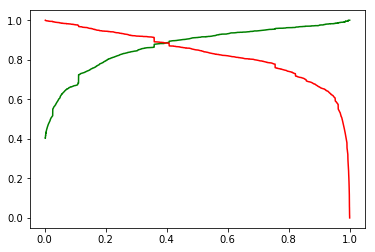

In [148]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

On observing the cut-off is similar to 0.35 like we saw for the case fo ROC curve

Applying our modle on test dataset

In [149]:
X_test[[ 'Page Views Per Visit', 'Total Time Spent on Website']]  = scaler.transform(X_test[['Page Views Per Visit', 'Total Time Spent on Website']])
X_test.head()

,Do Not Email,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Landing Page Submission,Lead Add Form,Lead Import,Lead Source_Direct Traffic,Lead Source_Olark Chat,Lead Source_Organic Search,...,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Profile_Potential Lead,City_Mumbai,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
7681,0,-0.304384,0.135997,1,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
984,0,-0.538073,0.399961,1,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8135,1,0.794688,-0.127967,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6915,0,-0.614753,-0.127967,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2712,0,-0.412100,0.399961,0,0,0,0,0,0,0,...,0,0,1,0,1,1,0,0,0,0


In [150]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Add Form,Lead Source_Direct Traffic,Lead Source_Organic Search,Lead Source_google,Last Activity_Converted to Lead,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off
7681,0,-0.304384,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
984,0,-0.538073,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0
8135,1,0.794688,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6915,0,-0.614753,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2712,0,-0.412100,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [151]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [152]:
y_test_pred = res.predict(X_test_sm).values.reshape(-1)

In [153]:
y_test_pred[:10]

array([0.02054287, 0.01693746, 0.1763441 , 0.00367281, 0.90490476,
       0.0083282 , 0.0755395 , 0.02625653, 0.96819536, 0.00339993])

In [154]:
y_test_pred_final = pd.DataFrame({'Lead':y_test.values, 'Lead_prob':y_test_pred})
y_test_pred_final['Lead_ID'] = y_test.index
y_test_pred_final['Lead_Score']=round(y_test_pred_final['Lead_prob']*100,0)
y_test_pred_final.head()

,Lead,Lead_prob,Lead_ID,Lead_Score
0,0,0.020543,7681,2.0
1,0,0.016937,984,2.0
2,0,0.176344,8135,18.0
3,0,0.003673,6915,0.0
4,1,0.904905,2712,90.0


In [155]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_test_pred_final['predicted'] = y_test_pred_final.Lead_prob.map(lambda x: 1 if x > 0.35 else 0)
y_test_pred_final.head()

,Lead,Lead_prob,Lead_ID,Lead_Score,predicted
0,0,0.020543,7681,2.0,0
1,0,0.016937,984,2.0,0
2,0,0.176344,8135,18.0,0
3,0,0.003673,6915,0.0,0
4,1,0.904905,2712,90.0,1


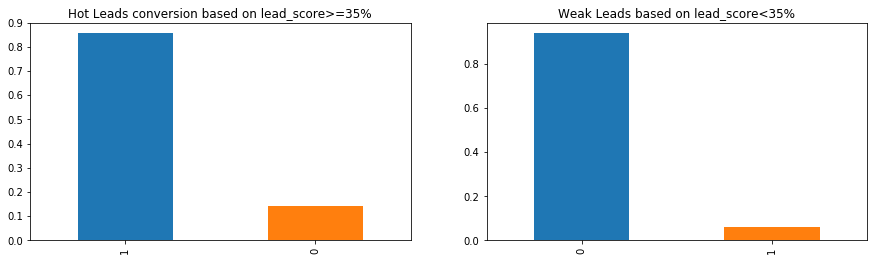

In [156]:
plt.figure(figsize=[15,4])
ax1=plt.subplot(1,2,1)
y_test_pred_final[y_test_pred_final['Lead_Score']>=35.0].Lead.value_counts(normalize=True).plot.bar()
plt.title('Hot Leads conversion based on lead_score>=35%')
ax2=plt.subplot(1,2,2)
y_test_pred_final[y_test_pred_final['Lead_Score']<35.0].Lead.value_counts(normalize=True).plot.bar()
plt.title('Weak Leads based on lead_score<35%')
plt.show()

In [157]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_test_pred_final.Lead, y_test_pred_final.predicted))

0.9050632911392406


In [158]:
##Calculating Sensitivity , Specificity , Precision and Recall
confusion_test = metrics.confusion_matrix(y_test_pred_final.Lead, y_test_pred_final.predicted )
confusion_test


array([[1523,  153],
       [ 102,  908]], dtype=int64)

In [159]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [160]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.899009900990099

In [161]:
# Let us calculate specificity
TN / float(TN+FP)

0.9087112171837709

In [162]:
#Precision

#TP / TP + FP 

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9126519585772175

In [163]:
#Recall
#TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.849895178197065

# Final Inferences:

**Training Dataset: ( For the cut-off 0.35----Optimal )**

1. Sensitivity : 84%
2. Specificity : 95%
3. Accuracy : 91%

**Training Dataset: ( For the cut-off 0.5 )**

1. Sensitivity : 85%
2. Specificity : 95%
3. Accuracy : 91%

We could see that there are no major changes in the values , however as observed before if the business is **stringent about the lead conversion** , **then we might want to reduce the sensitivity score , so we would have chosen the 0.5 instead of 0.35 as the cut-off 0.5 , the error in specificity measure is less .**
However if the business **wants only the accracy measure (i.,e converted should be predicted as converted correctly and vice-versa) then the cut-off 0.35 is precise **

**Testing Dataset: **

1. Sensitivity : 90%
2. Specificity : 91%
3. Accuracy : 91%

As seen the range of Sensitivity , Specificity and Accuracy remain the same as that of in training data . Our model has been great!

